In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
data= pd.read_csv(r"C:\Users\Rutuja Vartak\Downloads\train.csv")
data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
df1=data[data.Store==8]
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
68762,8,1,2010-02-05,16181.89,False
68763,8,1,2010-02-12,34262.09,True
68764,8,1,2010-02-19,22319.25,False
68765,8,1,2010-02-26,11722.71,False
68766,8,1,2010-03-05,12979.74,False


In [9]:
df2=df1[df1.Dept==3]
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
69048,8,3,2010-02-05,10483.04,False
69049,8,3,2010-02-12,9871.73,True
69050,8,3,2010-02-19,7243.11,False
69051,8,3,2010-02-26,8172.40,False
69052,8,3,2010-03-05,8746.22,False


In [10]:
len(df2['Store'])

143

In [11]:
df2.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
69186,8,3,2012-09-28,7736.56,False
69187,8,3,2012-10-05,8376.49,False
69188,8,3,2012-10-12,6808.46,False
69189,8,3,2012-10-19,6319.96,False
69190,8,3,2012-10-26,7342.71,False


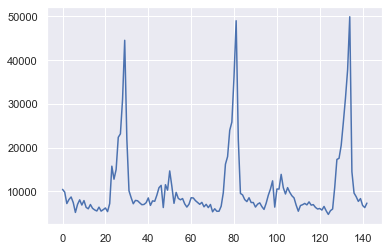

In [12]:
plt.plot(list(range(0,len(df2['Dept']))),df2['Weekly_Sales'])

In [13]:
df2['Date']=pd.to_datetime(df2['Date'],format = '%Y/%m/%d')
df2['Date']

C:\Users\RUTUJA~1\AppData\Local\Temp/ipykernel_16136/2902551050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=pd.to_datetime(df2['Date'],format = '%Y/%m/%d')


69048   2010-02-05
69049   2010-02-12
69050   2010-02-19
69051   2010-02-26
69052   2010-03-05
           ...    
69186   2012-09-28
69187   2012-10-05
69188   2012-10-12
69189   2012-10-19
69190   2012-10-26
Name: Date, Length: 143, dtype: datetime64[ns]

In [14]:
df3=pd.Series(df2['Weekly_Sales'].values,index=df2['Date'],name='am')
df3

Date
2010-02-05    10483.04
2010-02-12     9871.73
2010-02-19     7243.11
2010-02-26     8172.40
2010-03-05     8746.22
                ...   
2012-09-28     7736.56
2012-10-05     8376.49
2012-10-12     6808.46
2012-10-19     6319.96
2012-10-26     7342.71
Name: am, Length: 143, dtype: float64

In [15]:
df3_index=pd.DatetimeIndex(df3.index,freq=df3.index.inferred_freq)
df3.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

Text(0, 0.5, 'Weekly Sales')

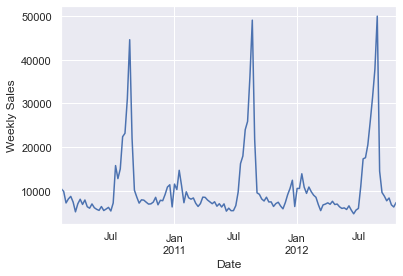

In [16]:
ax=df3.plot()
ax.set_ylabel('Weekly Sales')

<function matplotlib.pyplot.show(close=None, block=None)>

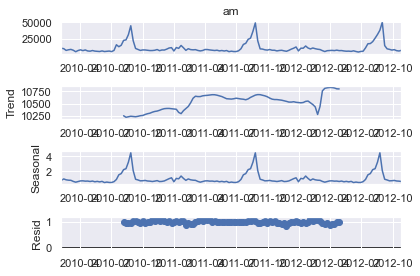

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3,model='multiplicative',period=52)
result.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

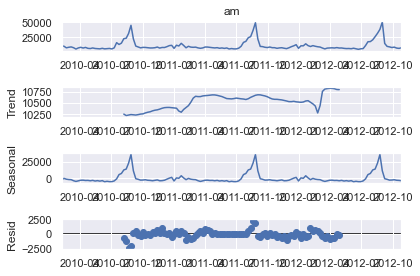

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3,model='additive',period=52)
result.plot()
plt.show

In [19]:
# KPSS Test to check stationarity of the time series

# H0 - Time Series is stationary
# H1 - Time Series is non-stationary


In [20]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values = kpss(df3)


C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [21]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical_values: {critical_values}')

if p <0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: 0.08332903589252985
p-value: 0.1
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary


In [22]:
# ADF test to check stationarity

# H0 - Time Series is non-stationary
# H1 - Time Series is stationary

In [23]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(df3,autolag = 'AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'    {key}, {value}')


ADF Statistic: -4.629210039632996
p-value: 0.00011406937935221123
Critical Values:
    1%, -3.4776006742422374
Critical Values:
    5%, -2.882265832283648
Critical Values:
    10%, -2.5778219289774156


In [24]:
# ACF and PACF Plots

In [25]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


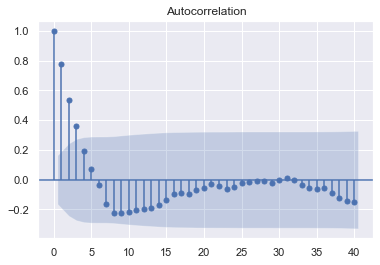

In [26]:
acf=sm.tsa.acf(df3,nlags=6)
acf

plot_acf(df3, lags=40)
plt.show()

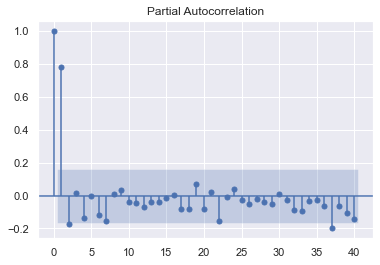

In [27]:
pacf=sm.tsa.pacf(df3,nlags=6)
pacf

plot_pacf(df3, lags=40)
plt.show()

In [28]:
from pmdarima import auto_arima

In [29]:
arima_model = auto_arima(df3,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                         start_P=0,D=0,start_Q=0,max_P=5,max_D=5,max_Q=5,m=52,
                         seasonal=True,trace=True,supress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2848.881, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=2825.823, Time=0.82 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=2830.922, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=2846.887, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=2850.751, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=2827.807, Time=4.64 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=2827.807, Time=1.39 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=2830.622, Time=1.06 sec
 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=2829.808, Time=5.44 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=2826.780, Time=0.60 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=2824.138, Time=1.15 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=2849.498, Time=0.07 sec
 ARIMA(2,1,0)(2,0,0)[52] intercept   : AIC=2826.101, Time=6.10 sec
 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=2826.101, Time=1.85 sec
 ARIMA(2,1,0)(0,0,1

In [30]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1394.104
Date:                             Tue, 03 May 2022   AIC                           2798.207
Time:                                     16:03:52   BIC                           2812.986
Sample:                                          0   HQIC                          2804.213
                                             - 143                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.1387      5.533      0.567      0.571      -7.705      13.983
ar.L1          0.5698      0.042     13.570      0.000       0.488       0.652
ma.L1         -0.9889      0.037    -26.681      0.000      -1.062      -0.916
ar.S.L52       0.6665      0.032     20.653      0.000       0.603       0.730
sigma2      1.582e+07   1.64e-05   9.67e+11      0.000    1.58e+07    1.58e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              4220.73
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             3.59
Prob(H) (two-sided):                  0.02   Kurtosis:                        28.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+27. Standard errors may be unstable.
"""

In [31]:
list(arima_model.predict(39))

[8436.59802089997,
 9015.34782161281,
 8656.658281590204,
 8355.30635566074,
 9378.617074902373,
 10640.713486425466,
 11611.199534681862,
 12880.917213558825,
 8893.872020682065,
 11658.987038954863,
 11666.042189893382,
 13911.11572921423,
 11882.971193763098,
 10937.299471425029,
 11914.430327755688,
 11210.809532902565,
 10690.049939709113,
 10371.513396965609,
 9269.682320688184,
 8357.05356385964,
 9228.615869705765,
 9368.841976356785,
 9565.180864270327,
 9354.371026986644,
 9817.025292202796,
 9331.19234909068,
 9411.90648748163,
 8996.991594383851,
 8757.453013392282,
 8848.298115854415,
 8612.152090255606,
 9176.23078288856,
 8515.174262608623,
 7972.759407742675,
 8552.788059058881,
 8806.712083746625,
 12167.714800112433,
 16375.792376310317,
 16556.21188642541]

In [35]:
predicted = pd.read_csv(r"C:\Users\Rutuja Vartak\Downloads\predicted.csv")
predicted

,Date,Weekly_Sales,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2012-11-02,8436.5980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-11-09,9015.3478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-11-16,8656.6582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-11-23,8355.3063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-11-30,9378.6170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012-12-07,10640.7134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012-12-14,11611.1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2012-12-21,12880.9172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012-12-28,8893.8720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-01-04,11658.9870,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
predicted['Date']=pd.to_datetime(predicted['Date'],format = '%Y/%m/%d')
predicted['Date']

0    2012-11-02
1    2012-11-09
2    2012-11-16
3    2012-11-23
4    2012-11-30
5    2012-12-07
6    2012-12-14
7    2012-12-21
8    2012-12-28
9    2013-01-04
10   2013-01-11
11   2013-01-18
12   2013-01-25
13   2013-02-01
14   2013-02-08
15   2013-02-15
16   2013-02-22
17   2013-03-01
18   2013-03-08
19   2013-03-15
20   2013-03-22
21   2013-03-29
22   2013-04-05
23   2013-04-12
24   2013-04-19
25   2013-04-26
26   2013-05-03
27   2013-05-10
28   2013-05-17
29   2013-05-24
30   2013-05-31
31   2013-06-07
32   2013-06-14
33   2013-06-21
34   2013-06-28
35   2013-07-05
36   2013-07-12
37   2013-07-19
38   2013-07-26
Name: Date, dtype: datetime64[ns]

In [37]:
df5=pd.Series(predicted['Weekly_Sales'].values,index=predicted['Date'],name='am')
df5

Date
2012-11-02     8436.5980
2012-11-09     9015.3478
2012-11-16     8656.6582
2012-11-23     8355.3063
2012-11-30     9378.6170
2012-12-07    10640.7134
2012-12-14    11611.1995
2012-12-21    12880.9172
2012-12-28     8893.8720
2013-01-04    11658.9870
2013-01-11    11666.0421
2013-01-18    13911.1157
2013-01-25    11882.9711
2013-02-01    10937.2994
2013-02-08    11914.4303
2013-02-15    11210.8095
2013-02-22    10690.0499
2013-03-01    10371.5133
2013-03-08     9269.6823
2013-03-15     8357.0535
2013-03-22     9228.6158
2013-03-29     9368.8419
2013-04-05     9565.1808
2013-04-12     9354.3710
2013-04-19     9817.0252
2013-04-26     9331.1923
2013-05-03     9411.9064
2013-05-10     8996.9915
2013-05-17     8757.4530
2013-05-24     8848.2981
2013-05-31     8612.1520
2013-06-07     9176.2307
2013-06-14     8515.1742
2013-06-21     7972.7594
2013-06-28     8552.7880
2013-07-05     8806.7120
2013-07-12    12167.7148
2013-07-19    16375.7923
2013-07-26    16556.2118
Name: am, dtype: flo

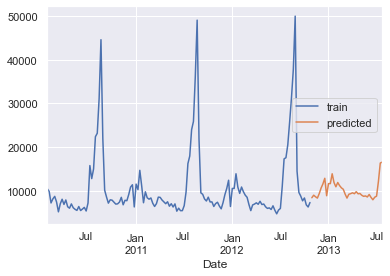

In [38]:
# Forecast plot usinf SARIMA

df3.plot(label='train')
df5.plot(label='predicted')

plt.legend()
plt.show()

In [39]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Date'>

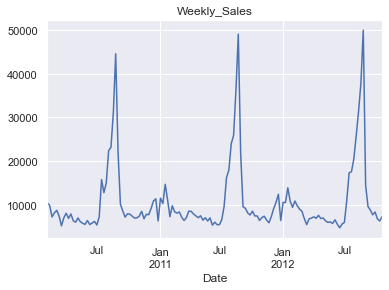

In [40]:
# plotting the original data
df3.plot(title='Weekly_Sales')

In [41]:
# SINGLE EXPONENTIAL SMOOTHING

In [42]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)
df3.index.freq = 'W-FRI'

# Split into train and test set
train_df3 = df3[:120]
test_df3 = df3[120:]

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

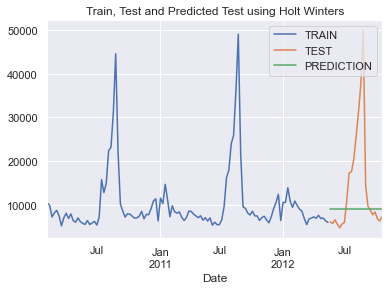

In [43]:
fitted_model=SimpleExpSmoothing(train_df3).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(23)
train_df3.plot(legend=True,label='TRAIN')
test_df3.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Single Exponential Smoothing')

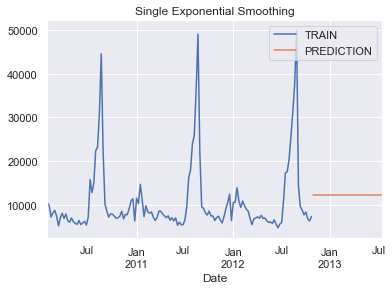

In [44]:
# Forecast next 38 week sales using SES

fitted_model=SimpleExpSmoothing(df3).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(38)
df3.plot(legend=True,label='TRAIN')
#test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Single Exponential Smoothing')

In [45]:
# DOUBLE EXPONENTIAL SMOOTHING

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

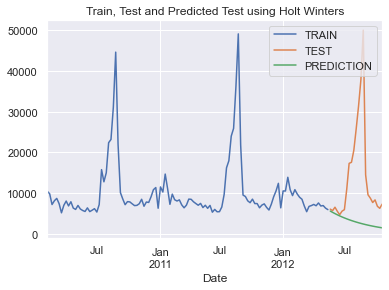

In [46]:
fitted_model = ExponentialSmoothing(train_df3,trend='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(23)
train_df3.plot(legend=True,label='TRAIN')
test_df3.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, ' Double Exponential Smoothing')

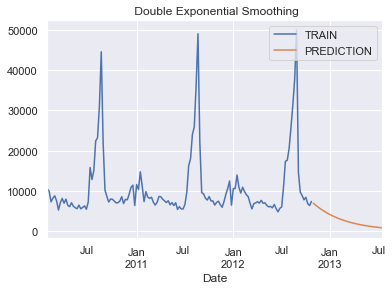

In [47]:
# Forecast next 38 week sales using DES

fitted_model= ExponentialSmoothing(df3,trend='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(38)
df3.plot(legend=True,label='TRAIN')
#test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title(' Double Exponential Smoothing')

In [48]:
# TRIPLE EXPONENTIAL SMOOTHING

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

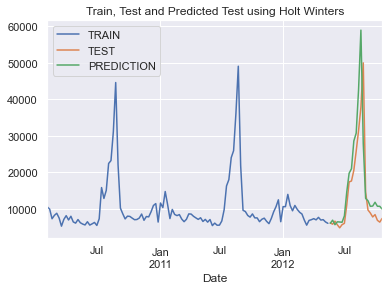

In [49]:
fitted_model = ExponentialSmoothing(train_df3,trend='mul',seasonal='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(23)
train_df3.plot(legend=True,label='TRAIN')
test_df3.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Holt Winters Triple Exponential Smoothing')

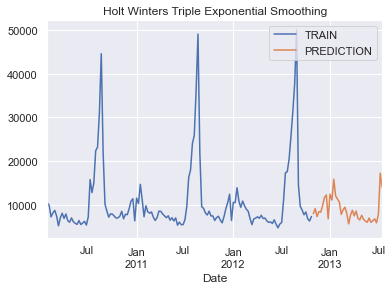

In [50]:
# Forecast next 38 week sales using TES

fitted_model= ExponentialSmoothing(df3,trend='mul',seasonal='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(38)
df3.plot(legend=True,label='TRAIN')
#test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Holt Winters Triple Exponential Smoothing')